# ABHEEK DAS

# TASK 2 : Prediction using Unsupervised ML

# Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [10]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Reading the Data

data = pd.read_csv('Iris_Dataset.csv')

In [12]:
# Data Interpretation

data.head() # First 5 data entries

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.tail() # Last 5 Data Entries

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
# Structure of the Data
data.shape

(150, 6)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Descriptive Statistics

In [16]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking Missing Values

In [17]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### No Missing Values in the data

In [18]:
# Dropping ID column as it is not required for further analysis
data = data.drop("Id", axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# To see different species
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Data Visualisation

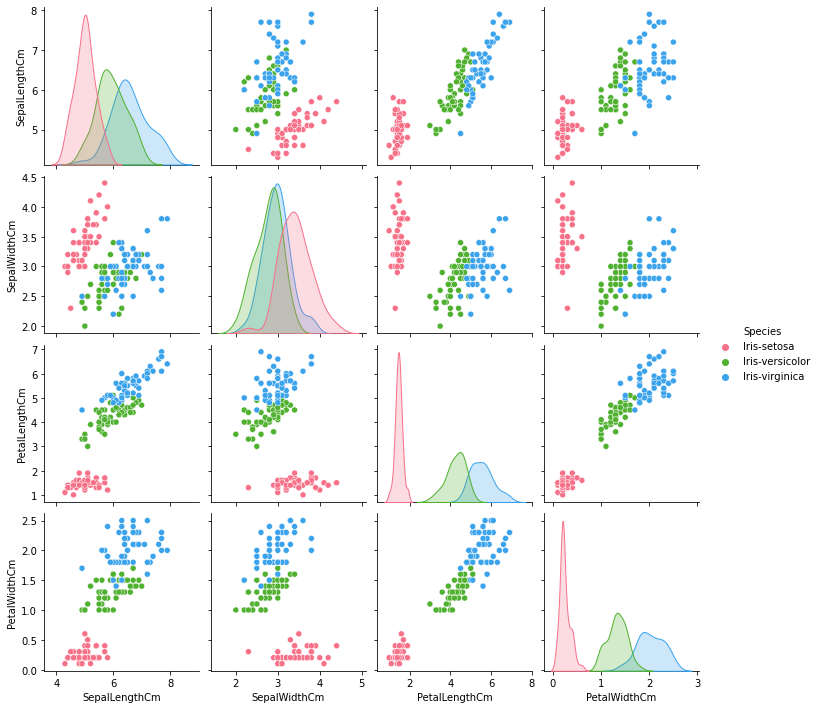

In [21]:
sns.pairplot(data, hue = 'Species', diag_kind = 'kde', palette = 'husl')

Setosa is off the map from two other species but Versicolor and Virginica have similar dimensions.

Setosa has low dimensions for all the features

Versicolor has average dimensions for all the features

Virginica has high dimensions for all the features

High Correlation betwenn Petal Length & Petal Width

# Correlation

<AxesSubplot:>

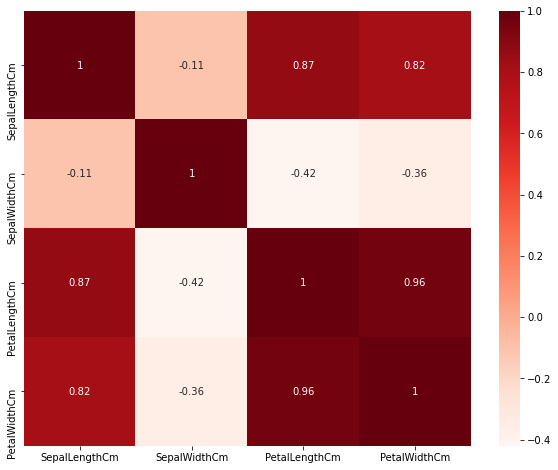

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, cmap='Reds')

###### Petal Width & Petal Length are Highly correlated

In [26]:
# For Predicting Clusters removing Species Column
X = data.iloc[:,0:4].values

# Finding Optimum number of clusters

In [27]:
from sklearn.cluster import KMeans

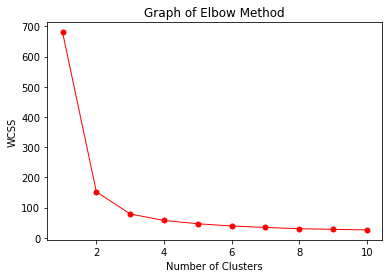

In [31]:
# WCSS --> Within Clusters Sum of Squares
WCSS_values = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 32)
    kmeans.fit(X)
    WCSS_values.append(kmeans.inertia_)
    
plt.plot(range(1,11), WCSS_values, color='red', marker='o', linewidth = 1, markersize = 5)
plt.title('Graph of Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Elbow formed at 3, therefore optimum no. of clusters is 3.

# Model Fitting

In [32]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 32)
y_pred = kmeans.fit_predict(X)

# Visualisation for Sepal Length & Sepal Width clusters

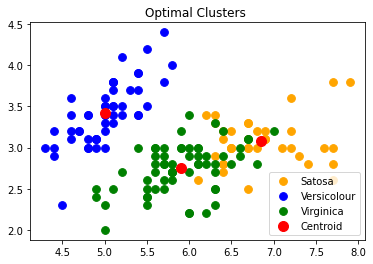

In [38]:
plt.scatter(X[y_pred == 0 , 0], X[y_pred == 0,1], s=60, c='orange', label='Satosa')
plt.scatter(X[y_pred == 1 , 0], X[y_pred == 1,1], s=60, c='blue', label='Versicolour')
plt.scatter(X[y_pred == 2 , 0], X[y_pred == 2,1], s=60, c='green', label='Virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label= 'Centroid')
plt.title("Optimal Clusters ")
plt.legend()
plt.show()

## We have 3 clusters for Satosa, Versicolor abd Virginica species of Iris flower